In [1]:
!pip install upsetplot

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
from ast import literal_eval
import os
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import classification_report
import torchvision
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
import matplotlib.pyplot as plt
from upsetplot import plot 
from matplotlib import pyplot
%matplotlib inline

In [13]:
search_path = "./"
file_extension = "*.csv"

dfs = []
[dfs.append(pd.read_csv(file, index_col=0))
 for path, subdir, files in os.walk(search_path)
 for file in glob(os.path.join(path, file_extension))]


df_orig = pd.concat(dfs, ignore_index=True)
df_orig.drop(['Unnamed: 0.1', 'Original_Accuracy_300epochs', 'Original_CI_300epochs'], axis = 1, inplace = True)

# df_orig['Accuracy'] = df_orig['Accuracy'].apply(lambda x: x*100)
# df_orig['Original_CI'] = df_orig.Original_CI.apply(lambda x: literal_eval(x))
# df_orig['Orig_CI_Low'], df_orig['Orig_CI_Hi'] = zip(*df_orig.Original_CI)

# Filter data into subsets based on test dataset used
df_orig_cifar10 = df_orig[df_orig['Testset'] == 'cifar10']
df_orig_cifar101 = df_orig[df_orig['Testset'] == 'cifar10.1']

In [14]:
df_orig_cifar10

,Model,Testset,Epoch,Loss,Accuracy,Original_Accuracy,Original_CI,Orig_CI_Low,Orig_CI_Hi
0,resnet_basic_32_ra_2_20,cifar10,400,1.7503,72.4100,92.5,"(92.0, 93.0)",92.0,93.0
1,resnet_basic_32_ra_2_20,cifar10,300,1.6118,72.5900,92.5,"(92.0, 93.0)",92.0,93.0
4,resnet_basic_32_ra_2_20_refined400,cifar10,50,0.4279,86.7000,92.5,"(92.0, 93.0)",92.0,93.0
5,resnet_basic_32_ra_2_20_refined300,cifar10,150,0.4342,87.4000,92.5,"(92.0, 93.0)",92.0,93.0
8,resnet_basic_32_ra_3_20,cifar10,400,4.3634,45.8700,92.5,"(92.0, 93.0)",92.0,93.0
9,resnet_basic_32_ra_3_20,cifar10,300,3.5888,47.4300,92.5,"(92.0, 93.0)",92.0,93.0
13,resnet_basic_32_ra_3_20_refined400,cifar10,50,0.4777,85.4600,92.5,"(92.0, 93.0)",92.0,93.0
14,resnet_basic_32_ra_3_20_refined300,cifar10,150,0.4869,85.7800,92.5,"(92.0, 93.0)",92.0,93.0
16,resnet_basic_32,cifar10,100,0.3604,91.7000,92.5,"(92.0, 93.0)",92.0,93.0
17,resnet_basic_32,cifar10,160,0.4011,92.3200,92.5,"(92.0, 93.0)",92.0,93.0


### now look into difference in images misclassified

In [31]:
# Retrieve the official labels of the CIFAR10 test dataset
testset = torchvision.datasets.CIFAR10(root='../../data/cifar10/', train=False,
                                       download=True)
test_labels_CIFAR10 = testset.targets
test_data_CIFAR10 = testset.data

# Retrieve the official labels of the CIFAR10.1 test dataset
test_labels_CIFAR101 =np.load('../data/cifar101/cifar10.1_v6_labels.npy')  
test_data_CIFAR101 = np.load('../data/cifar101/cifar10.1_v6_data.npy')

# Create a dictionary that maps numeric class number to class name
class_dict = {0: "airplane",
              1: "automobile",
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck"
}

classes = ['0 airplane', '1 automobile', '2 bird', '3 cat', '4  deer', '5 dog', '6 frog', 
           '7 horse', '8 ship', '9 truck']

# Confirm that when we compare these labels to our guesses, we get the accuracy score.
def confirm_score(zfile, test_labels):
    print("\nAccuracy:", zfile['acc'])
    print(" -> Sanity Check:", np.sum(test_labels_CIFAR10 == zfile['labels']), "of", 
          len(test_labels), "correct\n")
    
    # Examine the classes to see if the model is balanced in its accuracy across all labels 
    report = classification_report(test_labels, zfile['labels'], target_names=classes, output_dict=True)
    print(pd.DataFrame(report).transpose())


Files already downloaded and verified


In [32]:
number_to_analyze = 20

def error_by_r_score(zfile, test_labels, testset):
    images_to_print = []
    
    # Determine the probability we associatd with our predicted label
    pp_max = np.max(zfile['probs'], axis=1)

    # Retrieve the model's predicted probability of the correct label
    pp_correct = zfile['probs'][range(zfile['probs'].shape[0]), test_labels]

    # Calculate the R ratio for each document
    r = pp_max/pp_correct

    # Retrieve the row numbers where the R score is the highest
    max_r_value_indexes = r.argsort()[-1 * number_to_analyze:]

    # Create list to hold stats on highest R Score images
    stats = []
    
    for mi in max_r_value_indexes:
        #print("-- R Ratio:", r[mi], " ( index", mi, 
        #      ")\n   Guessed Label:", zfile['labels'][mi], class_dict[zfile['labels'][mi]], 
        #      "\n   Correct Label:", test_labels[mi], class_dict[test_labels[mi]],
        #      "\n   Class Probs:", zfile['probs'][mi], "\n")
        
        img_dict = {'prob_predicted': pp_max[mi],
                    'prob_correct': pp_correct[mi],
                    'r_value': r[mi],
                    'label_predicted_id': zfile['labels'][mi],
                    'label_predicted': class_dict[zfile['labels'][mi]],
                    'correct_label': test_labels[mi],
                    'correct_label_id': class_dict[test_labels[mi]],
                    'img_index': mi
                   }

        img=Image.fromarray(testset[mi])
        images_to_print.append(img)
        stats.append(img_dict)
        


    # Print the misclassified images
    fig = plt.figure(figsize=(16, 4))
    grid = ImageGrid(fig, 111,  
                     nrows_ncols=(2, 10),  
                     axes_pad=0.1,  
                     )

    for ax, im in zip(grid, images_to_print):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        
    return pd.DataFrame(stats)

### resnet 32, no ra

In [67]:

output = './resnet_basic_32/predictions_160.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9232
 -> Sanity Check: 9232 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.918208  0.9430  0.930439   1000.0000
1 automobile   0.965966  0.9650  0.965483   1000.0000
2 bird         0.898899  0.8980  0.898449   1000.0000
3 cat          0.848423  0.8340  0.841150   1000.0000
4  deer        0.916091  0.9280  0.922007   1000.0000
5 dog          0.883249  0.8700  0.876574   1000.0000
6 frog         0.951613  0.9440  0.947791   1000.0000
7 horse        0.948847  0.9460  0.947421   1000.0000
8 ship         0.953047  0.9540  0.953523   1000.0000
9 truck        0.946215  0.9500  0.948104   1000.0000
accuracy       0.923200  0.9232  0.923200      0.9232
macro avg      0.923056  0.9232  0.923094  10000.0000
weighted avg   0.923056  0.9232  0.923094  10000.0000


In [68]:
output = './resnet_basic_32/predictions_160_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.832
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.808743   0.740  0.772846   200.000
1 automobile   0.932515   0.760  0.837466   200.000
2 bird         0.795349   0.855  0.824096   200.000
3 cat          0.711340   0.690  0.700508   200.000
4  deer        0.866995   0.880  0.873449   200.000
5 dog          0.814070   0.810  0.812030   200.000
6 frog         0.880597   0.885  0.882793   200.000
7 horse        0.895000   0.895  0.895000   200.000
8 ship         0.831776   0.890  0.859903   200.000
9 truck        0.802632   0.915  0.855140   200.000
accuracy       0.832000   0.832  0.832000     0.832
macro avg      0.833902   0.832  0.831323  2000.000
weighted avg   0.833902   0.832  0.831323  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


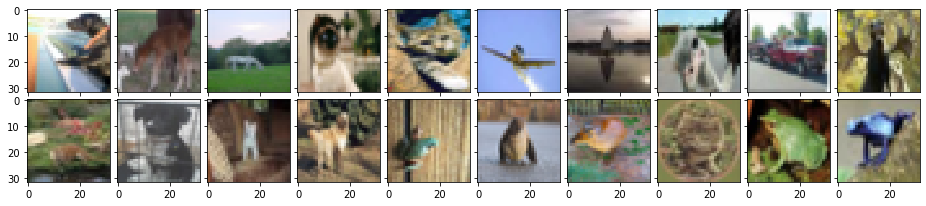

In [69]:
df_resnet32_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [70]:
df_resnet32_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.769989,6.086133e-07,1.265154e+06,0,airplane,5,dog,2525
1,0.999595,7.834623e-07,1.275869e+06,4,deer,7,horse,8943
2,0.976585,7.560041e-07,1.291772e+06,0,airplane,7,horse,4036
3,0.999999,6.714246e-07,1.489369e+06,5,dog,3,cat,1779
4,1.000000,4.381533e-07,2.282305e+06,2,bird,3,cat,1905
5,1.000000,2.810098e-07,3.558594e+06,2,bird,0,airplane,5454
6,0.999998,2.286959e-07,4.372610e+06,0,airplane,8,ship,5548
7,0.908763,1.495513e-07,6.076595e+06,5,dog,2,bird,7657
8,1.000000,9.241577e-08,1.082066e+07,9,truck,1,automobile,9227
9,0.999861,5.133766e-08,1.947617e+07,2,bird,4,deer,2785


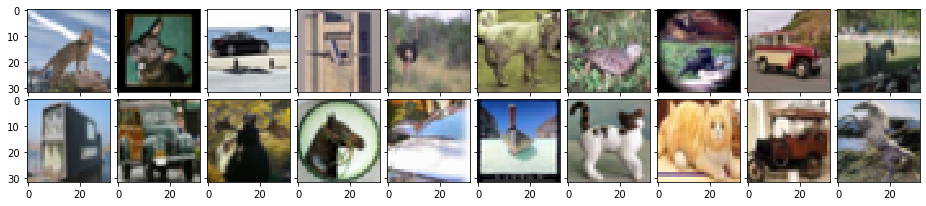

In [71]:
df_resnet32_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [72]:
df_resnet32_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999958,2.097298e-05,4.767841e+04,2,bird,3,cat,686
1,0.999980,1.765366e-05,5.664436e+04,3,cat,5,dog,1126
2,0.999982,1.750031e-05,5.714080e+04,0,airplane,1,automobile,221
3,0.531151,9.019657e-06,5.888811e+04,3,cat,0,airplane,98
4,0.995534,1.316287e-05,7.563194e+04,3,cat,2,bird,482
5,0.992970,7.657860e-06,1.296668e+05,7,horse,3,cat,641
6,0.999989,5.556863e-06,1.799557e+05,6,frog,2,bird,513
7,0.564810,3.126767e-06,1.806371e+05,8,ship,5,dog,1060
8,0.999996,3.651222e-06,2.738799e+05,9,truck,1,automobile,254
9,0.984561,3.139550e-06,3.135993e+05,0,airplane,7,horse,1426


### resnet 32 w/ ra 25

In [73]:

output = './resnet_basic_32_ra_2_5/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.8766
 -> Sanity Check: 8766 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.877395  0.9160  0.896282   1000.0000
1 automobile   0.958502  0.9470  0.952716   1000.0000
2 bird         0.838906  0.8280  0.833417   1000.0000
3 cat          0.744681  0.7350  0.739809   1000.0000
4  deer        0.843396  0.8940  0.867961   1000.0000
5 dog          0.791709  0.7830  0.787330   1000.0000
6 frog         0.915907  0.9040  0.909914   1000.0000
7 horse        0.935349  0.8970  0.915773   1000.0000
8 ship         0.935157  0.9230  0.929039   1000.0000
9 truck        0.927866  0.9390  0.933400   1000.0000
accuracy       0.876600  0.8766  0.876600      0.8766
macro avg      0.876887  0.8766  0.876564  10000.0000
weighted avg   0.876887  0.8766  0.876564  10000.0000


In [74]:
output = './resnet_basic_32_ra_2_5/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.779
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.721649   0.700  0.710660   200.000
1 automobile   0.931250   0.745  0.827778   200.000
2 bird         0.773684   0.735  0.753846   200.000
3 cat          0.633028   0.690  0.660287   200.000
4  deer        0.771028   0.825  0.797101   200.000
5 dog          0.734375   0.705  0.719388   200.000
6 frog         0.836634   0.845  0.840796   200.000
7 horse        0.846154   0.825  0.835443   200.000
8 ship         0.811594   0.840  0.825553   200.000
9 truck        0.771930   0.880  0.822430   200.000
accuracy       0.779000   0.779  0.779000     0.779
macro avg      0.783133   0.779  0.779328  2000.000
weighted avg   0.783133   0.779  0.779328  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


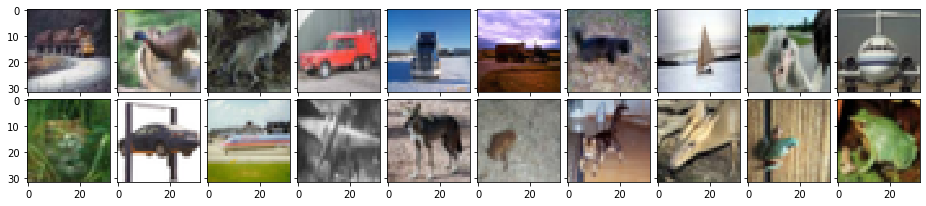

In [75]:
df_resnet32_errors_ra_2_5 = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [76]:
df_resnet32_errors_ra_2_5

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999080,2.654312e-05,3.763990e+04,8,ship,9,truck,2495
1,0.999782,1.644868e-05,6.078189e+04,7,horse,2,bird,4244
2,0.999593,1.588650e-05,6.292093e+04,6,frog,3,cat,862
3,0.999985,1.550530e-05,6.449307e+04,1,automobile,9,truck,6522
4,0.999952,1.230098e-05,8.129048e+04,0,airplane,9,truck,6545
5,0.999986,1.080741e-05,9.252783e+04,0,airplane,9,truck,3957
6,0.998719,6.897345e-06,1.447976e+05,4,deer,3,cat,7496
7,0.999995,5.108746e-06,1.957417e+05,0,airplane,8,ship,2705
8,0.964780,3.630401e-06,2.657503e+05,5,dog,2,bird,7657
9,0.999994,3.493923e-06,2.862097e+05,8,ship,0,airplane,1072


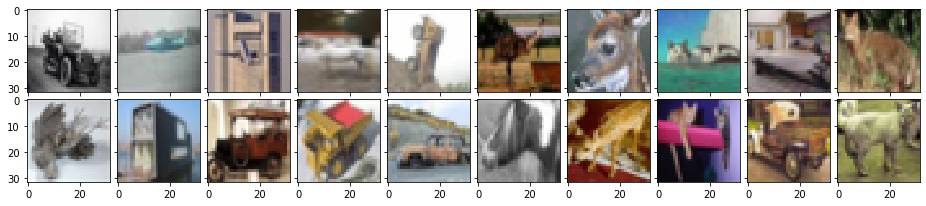

In [77]:
df_resnet32_errors_101_ra_2_5  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [78]:
df_resnet32_errors_101_ra_2_5

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999651,2.765867e-04,3.614242e+03,9,truck,1,automobile,283
1,0.999720,2.511136e-04,3.981149e+03,8,ship,0,airplane,177
2,0.607016,1.274724e-04,4.761940e+03,3,cat,0,airplane,98
3,0.999368,1.746133e-04,5.723322e+03,0,airplane,7,horse,1435
4,0.664067,9.640786e-05,6.888103e+03,5,dog,9,truck,1811
5,0.988985,1.245702e-04,7.939182e+03,7,horse,2,bird,571
6,0.999545,1.009981e-04,9.896674e+03,5,dog,4,deer,901
7,0.974293,7.940245e-05,1.227031e+04,0,airplane,3,cat,702
8,0.997369,7.881265e-05,1.265494e+04,9,truck,8,ship,1727
9,0.998231,7.521459e-05,1.327178e+04,4,deer,3,cat,668


# resnet 32, ra 2 20

In [79]:

output = './resnet_basic_32_ra_2_20/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.867
 -> Sanity Check: 8670 of 10000 correct

              precision  recall  f1-score    support
0 airplane     0.878122   0.879  0.878561   1000.000
1 automobile   0.944106   0.929  0.936492   1000.000
2 bird         0.810078   0.836  0.822835   1000.000
3 cat          0.738269   0.708  0.722818   1000.000
4  deer        0.839471   0.889  0.863526   1000.000
5 dog          0.801026   0.781  0.790886   1000.000
6 frog         0.901478   0.915  0.908189   1000.000
7 horse        0.924290   0.879  0.901076   1000.000
8 ship         0.908649   0.935  0.921636   1000.000
9 truck        0.923618   0.919  0.921303   1000.000
accuracy       0.867000   0.867  0.867000      0.867
macro avg      0.866911   0.867  0.866732  10000.000
weighted avg   0.866911   0.867  0.866732  10000.000


In [80]:
output = './resnet_basic_32_ra_2_20/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.7685
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score    support
0 airplane     0.755319  0.7100  0.731959   200.0000
1 automobile   0.941558  0.7250  0.819209   200.0000
2 bird         0.733333  0.7150  0.724051   200.0000
3 cat          0.619718  0.6600  0.639225   200.0000
4  deer        0.760369  0.8250  0.791367   200.0000
5 dog          0.751323  0.7100  0.730077   200.0000
6 frog         0.812808  0.8250  0.818859   200.0000
7 horse        0.826531  0.8100  0.818182   200.0000
8 ship         0.767442  0.8250  0.795181   200.0000
9 truck        0.765217  0.8800  0.818605   200.0000
accuracy       0.768500  0.7685  0.768500     0.7685
macro avg      0.773362  0.7685  0.768671  2000.0000
weighted avg   0.773362  0.7685  0.768671  2000.0000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


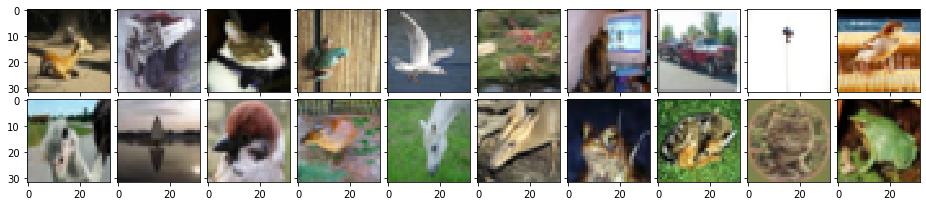

In [81]:
df_resnet32_errors_ra_2_20 = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [82]:
df_resnet32_errors_ra_2_20

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.996151,9.132718e-05,1.090750e+04,0,airplane,4,deer,2581
1,0.960837,8.589136e-05,1.118666e+04,3,cat,9,truck,5151
2,0.990263,8.374614e-05,1.182458e+04,6,frog,3,cat,245
3,0.990738,7.545416e-05,1.313033e+04,2,bird,6,frog,1935
4,0.996973,7.377886e-05,1.351299e+04,0,airplane,2,bird,2542
5,0.976763,6.212041e-05,1.572370e+04,4,deer,3,cat,4965
6,0.999825,5.857813e-05,1.706823e+04,9,truck,3,cat,5176
7,0.999938,5.747140e-05,1.739888e+04,9,truck,1,automobile,9227
8,0.999885,5.677293e-05,1.761200e+04,2,bird,0,airplane,3444
9,0.961098,5.363944e-05,1.791774e+04,7,horse,2,bird,1150


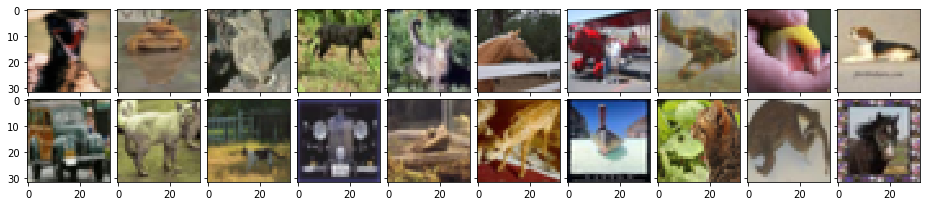

In [83]:
df_resnet32_errors_101_ra_2_20  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [84]:
df_resnet32_errors_101_ra_2_20

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.575018,0.000500,1150.375244,5,dog,2,bird,492
1,0.921814,0.000780,1181.826416,8,ship,6,frog,1265
2,0.991139,0.000763,1298.990967,6,frog,2,bird,515
3,0.675944,0.000467,1447.747681,7,horse,3,cat,743
4,0.998460,0.000496,2012.540161,2,bird,3,cat,601
5,0.994558,0.000475,2092.943359,8,ship,7,horse,1463
6,0.866659,0.000362,2391.539551,9,truck,0,airplane,79
7,0.895449,0.000359,2491.023438,6,frog,0,airplane,199
8,0.855882,0.000331,2581.872803,3,cat,2,bird,428
9,0.854890,0.000263,3249.347412,2,bird,5,dog,1161


### resnet 32, ra 3 20

In [85]:
output = './resnet_basic_32_ra_3_20/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.8546
 -> Sanity Check: 8546 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.867275  0.8560  0.861600   1000.0000
1 automobile   0.930514  0.9240  0.927245   1000.0000
2 bird         0.838745  0.7750  0.805613   1000.0000
3 cat          0.706781  0.7400  0.723009   1000.0000
4  deer        0.811853  0.8630  0.836646   1000.0000
5 dog          0.784334  0.7710  0.777610   1000.0000
6 frog         0.897281  0.8910  0.894129   1000.0000
7 horse        0.909744  0.8870  0.898228   1000.0000
8 ship         0.897585  0.9290  0.913022   1000.0000
9 truck        0.910000  0.9100  0.910000   1000.0000
accuracy       0.854600  0.8546  0.854600      0.8546
macro avg      0.855411  0.8546  0.854710  10000.0000
weighted avg   0.855411  0.8546  0.854710  10000.0000


In [86]:
output = './resnet_basic_32_ra_3_20/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.741
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.732620   0.685  0.708010   200.000
1 automobile   0.838150   0.725  0.777480   200.000
2 bird         0.726744   0.625  0.672043   200.000
3 cat          0.608511   0.715  0.657471   200.000
4  deer        0.724299   0.775  0.748792   200.000
5 dog          0.722513   0.690  0.705882   200.000
6 frog         0.809045   0.805  0.807018   200.000
7 horse        0.796954   0.785  0.790932   200.000
8 ship         0.750000   0.780  0.764706   200.000
9 truck        0.736607   0.825  0.778302   200.000
accuracy       0.741000   0.741  0.741000     0.741
macro avg      0.744544   0.741  0.741064  2000.000
weighted avg   0.744544   0.741  0.741064  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


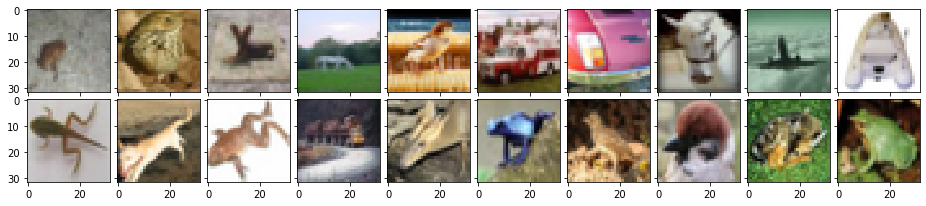

In [87]:
df_resnet32_errors_ra_3_20 = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [88]:
df_resnet32_errors_ra_3_20

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.998077,1.047517e-04,9.528028e+03,4,deer,6,frog,6063
1,0.999870,9.255511e-05,1.080297e+04,6,frog,2,bird,2226
2,0.998884,8.733530e-05,1.143734e+04,4,deer,5,dog,3192
3,0.972891,8.496435e-05,1.145058e+04,0,airplane,7,horse,4036
4,0.948107,7.812346e-05,1.213601e+04,4,deer,2,bird,1150
5,0.999925,7.064205e-05,1.415481e+04,9,truck,1,automobile,3560
6,0.942727,6.225733e-05,1.514242e+04,8,ship,1,automobile,2843
7,0.898497,4.411765e-05,2.036593e+04,5,dog,7,horse,2895
8,0.999957,3.885743e-05,2.573399e+04,8,ship,0,airplane,473
9,0.641516,2.287901e-05,2.803949e+04,5,dog,8,ship,2533


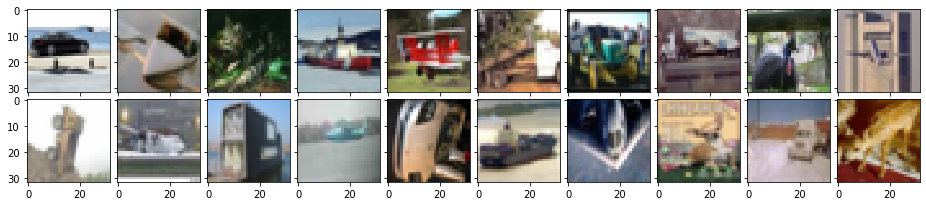

In [89]:
df_resnet32_errors_101_ra_3_20  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [90]:
df_resnet32_errors_101_ra_3_20

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.992429,0.001965,505.066650,0,airplane,1,automobile,221
1,0.822935,0.001622,507.275543,3,cat,0,airplane,184
2,0.987457,0.001837,537.616577,6,frog,3,cat,739
3,0.997632,0.001844,540.881165,9,truck,8,ship,1770
4,0.992744,0.001819,545.654907,9,truck,0,airplane,171
5,0.953991,0.001712,557.171814,3,cat,9,truck,1814
6,0.997653,0.001725,578.205383,9,truck,1,automobile,379
7,0.980648,0.001597,613.910095,8,ship,9,truck,1835
8,0.853427,0.000770,1107.961182,7,horse,2,bird,404
9,0.968340,0.000850,1139.657104,3,cat,0,airplane,98


### compare chart

The number of common misclassifications across all models: 1
{2405}


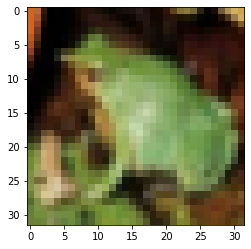

In [91]:
# View intersection of errors
#change the intersect
intersect = set(df_resnet32_errors.img_index) & \
            set(df_resnet32_errors_ra_2_5.img_index) & \
            set(df_resnet32_errors_ra_2_20.img_index) & \
            set(df_resnet32_errors_ra_3_20.img_index)

print("The number of common misclassifications across all models:", len(intersect))
print(intersect)

# View errors 
# df_errors = pd.DataFrame({'resnext_29_4x64' : df_resnext4_errors.img_index,
#                           'resnext_29_8x64' : df_resnext8_errors.img_index,
#                           'resnet32' : df_resnet32_errors.img_index,
#                           'densenet' : df_densenet_errors.img_index,
#                           'wrn_28_10' : df_wrn_28_10_errors.img_index,
#                           'pyramidnet_basic_110_84' : df_pyramidnet_basic_110_84_errors.img_index,
#                           'resnet44' : df_resnet44_errors.img_index}
#                         )

images_to_print = []

for i in intersect:
    img=Image.fromarray(test_data_CIFAR10[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [93]:
df = pd.DataFrame()

# change these labels

# intersect = set(df_resnet32_errors.img_index) & \
#             set(df_resnet32_errors_ra_2_5.img_index) & \
#             set(df_resnet32_errors_ra_2_20.img_index) & \
#             set(df_resnet32_errors_ra_3_20.img_index)

for m, me in [('resnet32', df_resnet32_errors.img_index), 
              ('resnet32_ra_2_5', df_resnet32_errors_ra_2_5.img_index), 
              ('resnet32_ra_2_20', df_resnet32_errors_ra_2_20.img_index), 
              ('resnet32_ra_3_20', df_resnet32_errors_ra_3_20.img_index)]:
    for e in me:
        df.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.fillna(False, inplace=True)
cols = df.columns
df.reset_index(inplace=True)
df

,index,2525,8943,4036,1779,1905,5454,5548,7657,9227,2785,4965,2590,4740,4528,1935,9704,1765,5511,2405,3615,2495,4244,862,6522,6545,3957,7496,2705,1072,3977,3828,2473,7816,5690,6063,4485,6753,2581,5151,245,2542,5176,3444,1150,4302,4309,1034,2128,2226,3192,3560,2843,2895,473,2533,8573,4942,893,9982
0,resnet32,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,resnet32_ra_2_5,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,resnet32_ra_2_20,False,False,False,False,False,False,True,True,True,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
3,resnet32_ra_3_20,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True


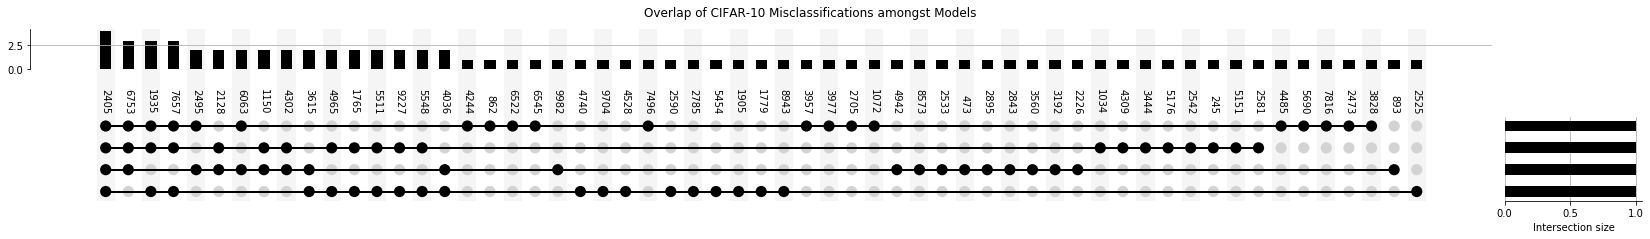

In [94]:
overlap = df.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show()  

In [95]:
# View intersection of errors
intersect101 = set(df_resnet32_errors_101.img_index) & \
            set(df_resnet32_errors_101_ra_2_5.img_index) & \
            set(df_resnet32_errors_101_ra_2_20.img_index) & \
            set(df_resnet32_errors_101_ra_3_20.img_index)

            
print("The number of common misclassifications across all models:", len(intersect101))
print(intersect101)

# View errors 
# df_errors_101 = pd.DataFrame({'resnext_29_4x64' : df_resnext4_errors_101.img_index,
#                              'resnext_29_8x64' : df_resnext8_errors_101.img_index,
#                              'resnet32' : df_resnet32_errors_101.img_index,
#                              'densenet' : df_densenet_errors_101.img_index,
#                              'wrn_28_10' : df_wrn_28_10_errors_101.img_index,
#                              'pyramidnet_basic_110_84' : df_pyramidnet_basic_110_84_errors_101.img_index,
#                              'resnet44' : df_resnet44_errors.img_index})

images_to_print = []

for i in intersect101:
    img=Image.fromarray(test_data_CIFAR101[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect101)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

The number of common misclassifications across all models: 0
set()


IndexError: list index out of range

<Figure size 1152x288 with 0 Axes>

In [96]:
df101 = pd.DataFrame()

for m, me in [('resnet32', df_resnet32_errors_101.img_index), 
              ('resnet32_ra_2_5', df_resnet32_errors_101_ra_2_5.img_index), 
              ('resnet32_ra_2_20', df_resnet32_errors_101_ra_2_20.img_index), 
              ('resnet32_ra_3_20', df_resnet32_errors_101_ra_3_20.img_index)]:
    for e in me:
        df101.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df101.fillna(False, inplace=True)
cols = df101.columns
df101.reset_index(inplace=True)
df101

,index,686,1126,221,98,482,641,513,1060,254,1426,1761,392,936,1412,304,1621,600,602,391,1528,283,177,1435,1811,571,901,702,1727,668,433,1824,265,1585,910,732,336,492,1265,515,743,601,1463,79,199,428,1161,772,382,1216,605,1219,1536,184,739,1770,171,1814,379,1835,404,182,299,1786,14,1072,1993
0,resnet32,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,resnet32_ra_2_5,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,resnet32_ra_2_20,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,resnet32_ra_3_20,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True


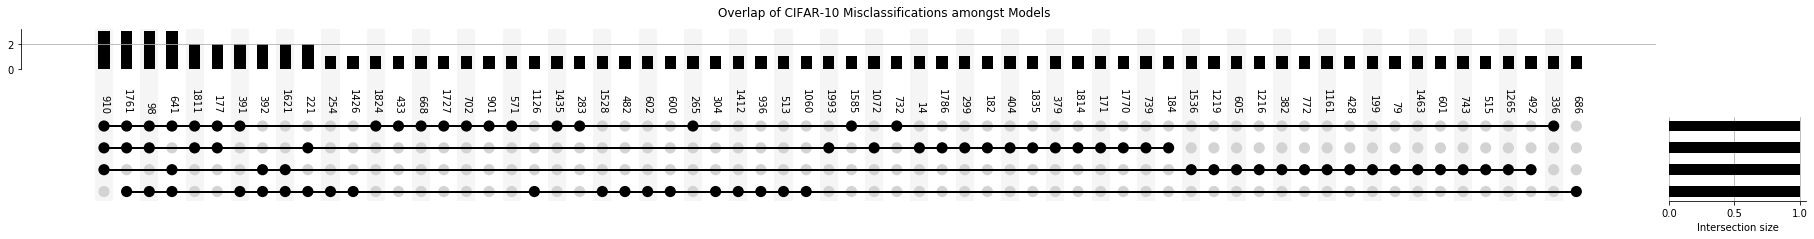

In [97]:
overlap = df101.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show() 

### now redo for wrn

### wrn_28_10, no RA

In [102]:
output = './wrn_28_10/predictions_200.npz'
npzfile = np.load(output)

confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9578
 -> Sanity Check: 9578 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.953876  0.9720  0.962853   1000.0000
1 automobile   0.972305  0.9830  0.977623   1000.0000
2 bird         0.963115  0.9400  0.951417   1000.0000
3 cat          0.905584  0.8920  0.898741   1000.0000
4  deer        0.956565  0.9690  0.962742   1000.0000
5 dog          0.915187  0.9280  0.921549   1000.0000
6 frog         0.971202  0.9780  0.974589   1000.0000
7 horse        0.990798  0.9690  0.979778   1000.0000
8 ship         0.972973  0.9720  0.972486   1000.0000
9 truck        0.976954  0.9750  0.975976   1000.0000
accuracy       0.957800  0.9578  0.957800      0.9578
macro avg      0.957856  0.9578  0.957775  10000.0000
weighted avg   0.957856  0.9578  0.957775  10000.0000


In [103]:
output = './wrn_28_10/predictions_200_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.8975
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score    support
0 airplane     0.846154  0.8800  0.862745   200.0000
1 automobile   0.957831  0.7950  0.868852   200.0000
2 bird         0.876847  0.8900  0.883375   200.0000
3 cat          0.841346  0.8750  0.857843   200.0000
4  deer        0.913876  0.9550  0.933985   200.0000
5 dog          0.928962  0.8500  0.887728   200.0000
6 frog         0.913043  0.9450  0.928747   200.0000
7 horse        0.974093  0.9400  0.956743   200.0000
8 ship         0.905473  0.9100  0.907731   200.0000
9 truck        0.842342  0.9350  0.886256   200.0000
accuracy       0.897500  0.8975  0.897500     0.8975
macro avg      0.899997  0.8975  0.897401  2000.0000
weighted avg   0.899997  0.8975  0.897401  2000.0000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


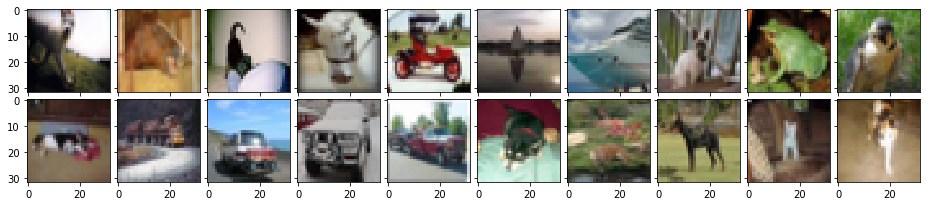

In [104]:
df_wrn_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [105]:
df_wrn_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.995518,0.000265,3762.125488,3,cat,5,dog,3059
1,0.994562,0.000225,4424.791504,3,cat,7,horse,6151
2,0.997089,0.000196,5077.148438,2,bird,5,dog,810
3,0.999023,0.000196,5107.759277,5,dog,7,horse,2895
4,0.998923,0.000191,5243.682617,9,truck,1,automobile,1969
5,0.999607,0.000187,5342.721680,0,airplane,8,ship,5548
6,0.999690,0.000183,5462.998047,0,airplane,8,ship,665
7,0.999728,0.000168,5936.280762,5,dog,3,cat,4614
8,0.999142,0.000160,6236.280273,6,frog,3,cat,2405
9,0.999551,0.000152,6564.255371,5,dog,2,bird,384


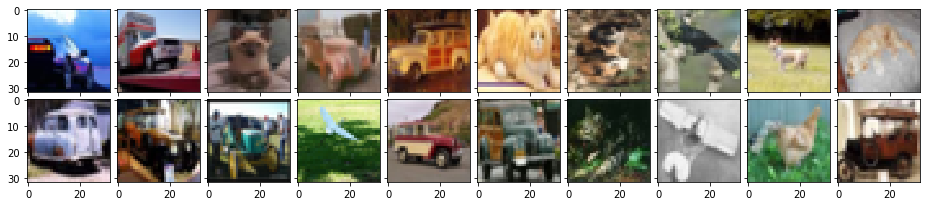

In [106]:
df_wrn_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [107]:
df_wrn_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.998249,0.000777,1285.422852,0,airplane,1,automobile,300
1,0.998971,0.000741,1347.244019,1,automobile,9,truck,1838
2,0.998506,0.000646,1544.983765,3,cat,5,dog,1177
3,0.995936,0.000539,1847.855225,9,truck,1,automobile,341
4,0.998563,0.000470,2125.257568,9,truck,1,automobile,390
5,0.998716,0.000446,2237.118896,5,dog,3,cat,602
6,0.999167,0.000437,2286.743164,5,dog,3,cat,783
7,0.998615,0.000436,2289.148438,0,airplane,2,bird,506
8,0.999127,0.000311,3216.876465,4,deer,5,dog,1076
9,0.998036,0.000298,3349.983398,3,cat,5,dog,1134


### wrn_28_10, RA(2,5)

In [108]:
output = './wrn_28_10_ra_2_5/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9403
 -> Sanity Check: 9403 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.941061  0.9580  0.949455   1000.0000
1 automobile   0.978894  0.9740  0.976441   1000.0000
2 bird         0.946429  0.9010  0.923156   1000.0000
3 cat          0.869960  0.8630  0.866466   1000.0000
4  deer        0.935294  0.9540  0.944554   1000.0000
5 dog          0.885035  0.8930  0.889000   1000.0000
6 frog         0.944063  0.9620  0.952947   1000.0000
7 horse        0.972837  0.9670  0.969910   1000.0000
8 ship         0.955709  0.9710  0.963294   1000.0000
9 truck        0.974619  0.9600  0.967254   1000.0000
accuracy       0.940300  0.9403  0.940300      0.9403
macro avg      0.940390  0.9403  0.940248  10000.0000
weighted avg   0.940390  0.9403  0.940248  10000.0000


In [109]:
output = './wrn_28_10_ra_2_5/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.852
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.820000   0.820  0.820000   200.000
1 automobile   0.975309   0.790  0.872928   200.000
2 bird         0.872340   0.820  0.845361   200.000
3 cat          0.755000   0.755  0.755000   200.000
4  deer        0.857820   0.905  0.880779   200.000
5 dog          0.844560   0.815  0.829517   200.000
6 frog         0.891089   0.900  0.895522   200.000
7 horse        0.911458   0.875  0.892857   200.000
8 ship         0.845070   0.900  0.871671   200.000
9 truck        0.786611   0.940  0.856492   200.000
accuracy       0.852000   0.852  0.852000     0.852
macro avg      0.855926   0.852  0.852013  2000.000
weighted avg   0.855926   0.852  0.852013  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


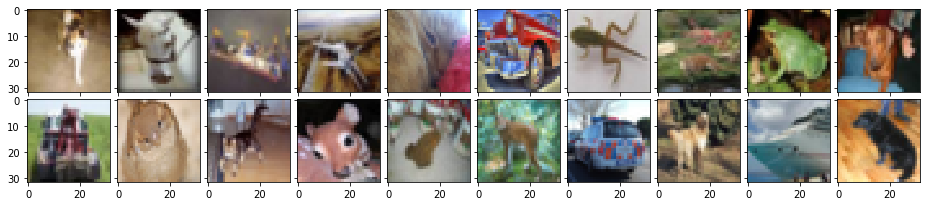

In [110]:
df_wrn_28_10_ra_2_5_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [111]:
df_wrn_28_10_ra_2_5_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999435,0.000123,8112.354004,5,dog,3,cat,7099
1,0.999335,0.000108,9229.202148,5,dog,7,horse,2895
2,0.999107,0.000108,9265.864258,6,frog,8,ship,5398
3,0.999546,0.000099,10141.971680,4,deer,0,airplane,3097
4,0.999422,0.000096,10436.019531,4,deer,3,cat,916
5,0.999766,0.000088,11321.538086,9,truck,1,automobile,7892
6,0.998814,0.000087,11443.451172,0,airplane,6,frog,8573
7,0.999244,0.000087,11486.103516,4,deer,3,cat,4965
8,0.999167,0.000084,11829.608398,6,frog,3,cat,2405
9,0.999664,0.000080,12511.045898,3,cat,5,dog,8410


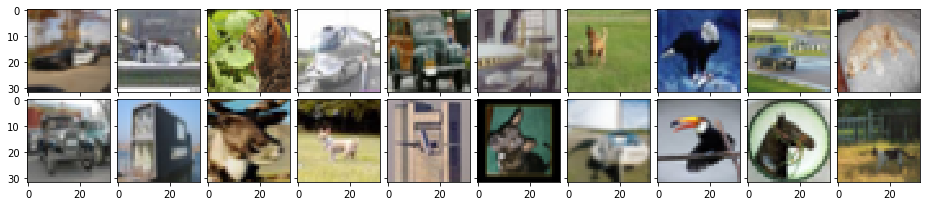

In [112]:
df_wrn_28_10_ra_2_5_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [113]:
df_wrn_28_10_ra_2_5_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.998205,0.000259,3857.569336,9,truck,1,automobile,369
1,0.998282,0.000241,4144.298828,8,ship,0,airplane,182
2,0.998585,0.000236,4233.838867,6,frog,3,cat,605
3,0.998519,0.000233,4276.562012,0,airplane,9,truck,1872
4,0.998939,0.000223,4475.618164,9,truck,1,automobile,392
5,0.996132,0.000207,4812.640137,9,truck,0,airplane,108
6,0.999173,0.000206,4860.127930,4,deer,5,dog,1162
7,0.998150,0.000198,5042.285156,3,cat,2,bird,581
8,0.999206,0.000190,5269.535156,0,airplane,1,automobile,353
9,0.999467,0.000158,6315.770020,3,cat,5,dog,1134


### wrn_28_10, RA(2,20)

In [116]:
output = './wrn_28_10_ra_2_20/predictions_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9315
 -> Sanity Check: 9315 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.943057  0.9440  0.943528   1000.0000
1 automobile   0.964965  0.9640  0.964482   1000.0000
2 bird         0.910256  0.9230  0.916584   1000.0000
3 cat          0.884868  0.8070  0.844142   1000.0000
4  deer        0.897363  0.9530  0.924345   1000.0000
5 dog          0.875124  0.8830  0.879044   1000.0000
6 frog         0.945152  0.9650  0.954973   1000.0000
7 horse        0.973388  0.9510  0.962064   1000.0000
8 ship         0.963928  0.9620  0.962963   1000.0000
9 truck        0.956306  0.9630  0.959641   1000.0000
accuracy       0.931500  0.9315  0.931500      0.9315
macro avg      0.931441  0.9315  0.931177  10000.0000
weighted avg   0.931441  0.9315  0.931177  10000.0000


In [117]:
output = './wrn_28_10_ra_2_20/predictions_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.847
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.850515   0.825  0.837563   200.000
1 automobile   0.928571   0.780  0.847826   200.000
2 bird         0.843137   0.860  0.851485   200.000
3 cat          0.764398   0.730  0.746803   200.000
4  deer        0.807339   0.880  0.842105   200.000
5 dog          0.812183   0.800  0.806045   200.000
6 frog         0.878049   0.900  0.888889   200.000
7 horse        0.907692   0.885  0.896203   200.000
8 ship         0.907692   0.885  0.896203   200.000
9 truck        0.793991   0.925  0.854503   200.000
accuracy       0.847000   0.847  0.847000     0.847
macro avg      0.849357   0.847  0.846763  2000.000
weighted avg   0.849357   0.847  0.846763  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


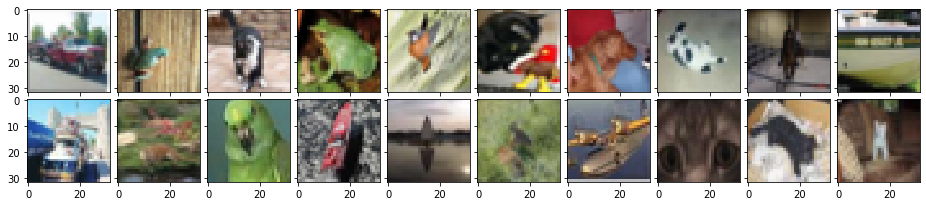

In [118]:
df_wrn_28_10_ra_2_20_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [119]:
df_wrn_28_10_ra_2_20_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999611,0.000072,13824.489258,9,truck,1,automobile,9227
1,0.996567,0.000070,14317.442383,2,bird,6,frog,1935
2,0.999573,0.000057,17452.824219,5,dog,3,cat,1163
3,0.999566,0.000055,18231.906250,6,frog,3,cat,2405
4,0.999850,0.000054,18463.712891,6,frog,2,bird,2675
5,0.999705,0.000054,18529.562500,5,dog,3,cat,2779
6,0.999883,0.000053,18784.687500,3,cat,5,dog,158
7,0.999659,0.000053,18866.865234,5,dog,3,cat,2350
8,0.998825,0.000038,26262.482422,0,airplane,7,horse,6631
9,0.999695,0.000038,26474.572266,0,airplane,8,ship,683


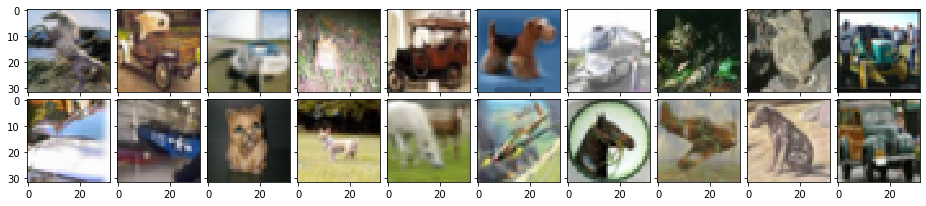

In [120]:
df_wrn_28_10_ra_2_20_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [121]:
df_wrn_28_10_ra_2_20_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.990729,0.000263,3760.246338,3,cat,7,horse,1528
1,0.999461,0.000251,3984.932373,9,truck,1,automobile,336
2,0.997556,0.000247,4043.453125,0,airplane,8,ship,1753
3,0.999356,0.000245,4079.575684,4,deer,6,frog,1344
4,0.998879,0.000239,4173.080078,9,truck,1,automobile,391
5,0.997308,0.000233,4280.050293,3,cat,5,dog,1146
6,0.996258,0.000202,4924.016113,0,airplane,9,truck,1872
7,0.999108,0.000189,5284.491699,6,frog,3,cat,739
8,0.999347,0.000165,6061.375488,6,frog,2,bird,515
9,0.999013,0.000163,6135.445801,9,truck,1,automobile,379


### wrn_28_10, RA(3,20)

In [123]:
output = './wrn_28_10_ra_3_20/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9001
 -> Sanity Check: 9001 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.909633  0.9160  0.912805   1000.0000
1 automobile   0.941406  0.9640  0.952569   1000.0000
2 bird         0.878788  0.8700  0.874372   1000.0000
3 cat          0.795025  0.7990  0.797007   1000.0000
4  deer        0.882066  0.9050  0.893386   1000.0000
5 dog          0.854639  0.8290  0.841624   1000.0000
6 frog         0.915370  0.9410  0.928008   1000.0000
7 horse        0.928571  0.9100  0.919192   1000.0000
8 ship         0.947154  0.9320  0.939516   1000.0000
9 truck        0.948276  0.9350  0.941591   1000.0000
accuracy       0.900100  0.9001  0.900100      0.9001
macro avg      0.900093  0.9001  0.900007  10000.0000
weighted avg   0.900093  0.9001  0.900007  10000.0000


In [124]:
output = './wrn_28_10_ra_3_20/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.798
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.772727   0.765  0.768844   200.000
1 automobile   0.893491   0.755  0.818428   200.000
2 bird         0.776119   0.780  0.778055   200.000
3 cat          0.677725   0.715  0.695864   200.000
4  deer        0.777778   0.840  0.807692   200.000
5 dog          0.772277   0.780  0.776119   200.000
6 frog         0.841584   0.850  0.845771   200.000
7 horse        0.903409   0.795  0.845745   200.000
8 ship         0.825641   0.805  0.815190   200.000
9 truck        0.778261   0.895  0.832558   200.000
accuracy       0.798000   0.798  0.798000     0.798
macro avg      0.801901   0.798  0.798427  2000.000
weighted avg   0.801901   0.798  0.798427  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


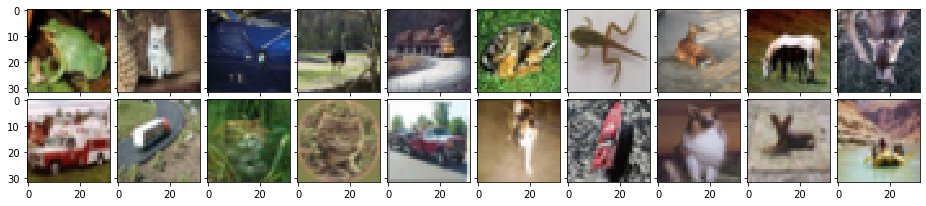

In [125]:
df_wrn_28_10_ra_3_20_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [126]:
df_wrn_28_10_ra_3_20_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.994427,0.001140,872.003540,6,frog,3,cat,2405
1,0.995187,0.001130,880.931580,3,cat,5,dog,4906
2,0.988764,0.001076,918.807190,0,airplane,1,automobile,4055
3,0.996933,0.001010,987.120483,4,deer,2,bird,7906
4,0.995052,0.000984,1010.844116,8,ship,9,truck,2495
5,0.996960,0.000958,1040.760620,6,frog,4,deer,2128
6,0.987723,0.000940,1051.141113,0,airplane,6,frog,8573
7,0.988193,0.000935,1057.454834,3,cat,4,deer,3696
8,0.993246,0.000776,1280.566650,4,deer,7,horse,5677
9,0.996765,0.000602,1655.688110,2,bird,4,deer,1393


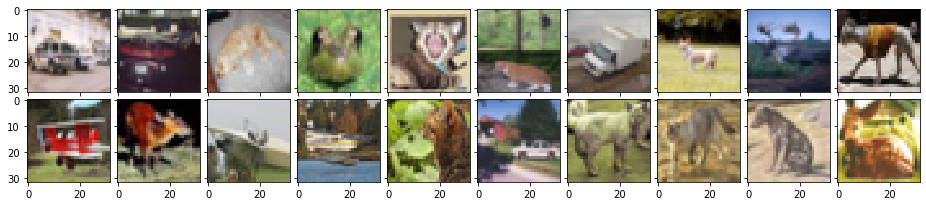

In [127]:
df_wrn_28_10_ra_3_20_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [128]:
df_wrn_28_10_ra_3_20_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.991921,0.002160,459.137909,9,truck,1,automobile,368
1,0.990231,0.002129,465.009094,0,airplane,1,automobile,308
2,0.991704,0.002043,485.420319,3,cat,5,dog,1134
3,0.979118,0.001915,511.215210,2,bird,6,frog,1361
4,0.989455,0.001813,545.708740,4,deer,3,cat,630
5,0.930468,0.001694,549.384583,4,deer,3,cat,699
6,0.993542,0.001575,630.727051,8,ship,9,truck,1947
7,0.981260,0.001492,657.621399,4,deer,5,dog,1076
8,0.984591,0.001493,659.576965,0,airplane,4,deer,952
9,0.992387,0.001449,684.732666,7,horse,5,dog,1121


### compare all wrn

The number of common misclassifications across all models: 1
{2405}


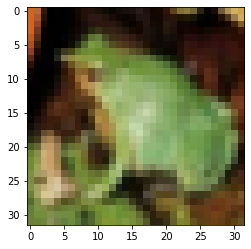

In [135]:
# View intersection of errors
#change the intersect
intersect = set(df_wrn_errors.img_index) & \
            set(df_wrn_28_10_ra_2_5_errors.img_index) & \
            set(df_wrn_28_10_ra_2_20_errors.img_index) & \
            set(df_wrn_28_10_ra_3_20_errors.img_index)

print("The number of common misclassifications across all models:", len(intersect))
print(intersect)

images_to_print = []

for i in intersect:
    img=Image.fromarray(test_data_CIFAR10[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [136]:
df = pd.DataFrame()

# change these labels

# intersect = set(df_resnet32_errors.img_index) & \
#             set(df_resnet32_errors_ra_2_5.img_index) & \
#             set(df_resnet32_errors_ra_2_20.img_index) & \
#             set(df_resnet32_errors_ra_3_20.img_index)

for m, me in [('wrn', df_wrn_errors.img_index), 
              ('wrn_ra_2_5', df_wrn_28_10_ra_2_5_errors.img_index), 
              ('wrn_ra_2_20', df_wrn_28_10_ra_2_20_errors.img_index), 
              ('wrn_ra_3_20', df_wrn_28_10_ra_3_20_errors.img_index)]:
    for e in me:
        df.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.fillna(False, inplace=True)
cols = df.columns
df.reset_index(inplace=True)
df

,index,3059,6151,810,2895,1969,5548,665,4614,2405,384,7509,2495,7311,4276,9227,128,4965,1506,4740,7099,5398,3097,916,7892,8573,8410,213,7761,4485,4112,59,8354,1131,4528,3236,1935,1163,2675,2779,158,2350,6631,683,2271,7107,1685,9386,2248,3084,275,4906,4055,7906,2128,3696,5677,1393,3560,4590,3977,5511,5426,3192,8757
0,wrn,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,wrn_ra_2_5,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,wrn_ra_2_20,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,wrn_ra_3_20,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True


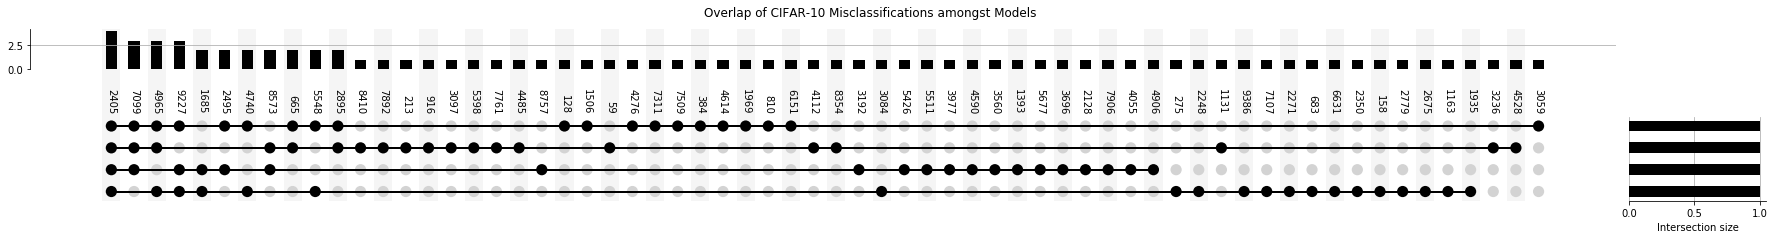

In [137]:
overlap = df.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show()  

The number of common misclassifications across all models: 1
{1076}


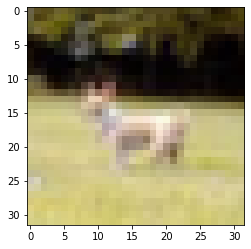

In [138]:
# View intersection of errors
intersect101 = set(df_wrn_errors_101.img_index) & \
            set(df_wrn_28_10_ra_2_5_errors_101.img_index) & \
            set(df_wrn_28_10_ra_2_20_errors_101.img_index) & \
            set(df_wrn_28_10_ra_3_20_errors_101.img_index)

            
print("The number of common misclassifications across all models:", len(intersect101))
print(intersect101)

# View errors 
# df_errors_101 = pd.DataFrame({'resnext_29_4x64' : df_resnext4_errors_101.img_index,
#                              'resnext_29_8x64' : df_resnext8_errors_101.img_index,
#                              'resnet32' : df_resnet32_errors_101.img_index,
#                              'densenet' : df_densenet_errors_101.img_index,
#                              'wrn_28_10' : df_wrn_28_10_errors_101.img_index,
#                              'pyramidnet_basic_110_84' : df_pyramidnet_basic_110_84_errors_101.img_index,
#                              'resnet44' : df_resnet44_errors.img_index})

images_to_print = []

for i in intersect101:
    img=Image.fromarray(test_data_CIFAR101[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect101)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [150]:
df101 = pd.DataFrame()

for m, me in [('wrn', df_wrn_errors_101.img_index), 
              ('wrn_ra_2_5', df_wrn_28_10_ra_2_5_errors_101.img_index), 
              ('wrn_ra_2_20', df_wrn_28_10_ra_2_20_errors_101.img_index), 
              ('wrn_ra_3_20', df_wrn_28_10_ra_3_20_errors_101.img_index)]:
    for e in me:
        df101.loc[m, str(e)] = True

pd.options.display.max_rows = None
pd.options.display.max_columns = None
df101.fillna(False, inplace=True)
cols = df101.columns
df101.reset_index(inplace=True)
df101

,index,300,1838,1177,341,390,602,783,506,1076,1134,352,344,379,577,254,392,739,124,592,391,369,182,605,1872,108,1162,581,353,277,1761,996,98,1126,1753,419,1412,772,1528,336,1344,1146,515,304,131,757,1419,87,199,1148,368,308,1361,630,699,1947,952,1121,171,866,119,187,365,641,680,861
0,wrn,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,wrn_ra_2_5,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,wrn_ra_2_20,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,wrn_ra_3_20,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


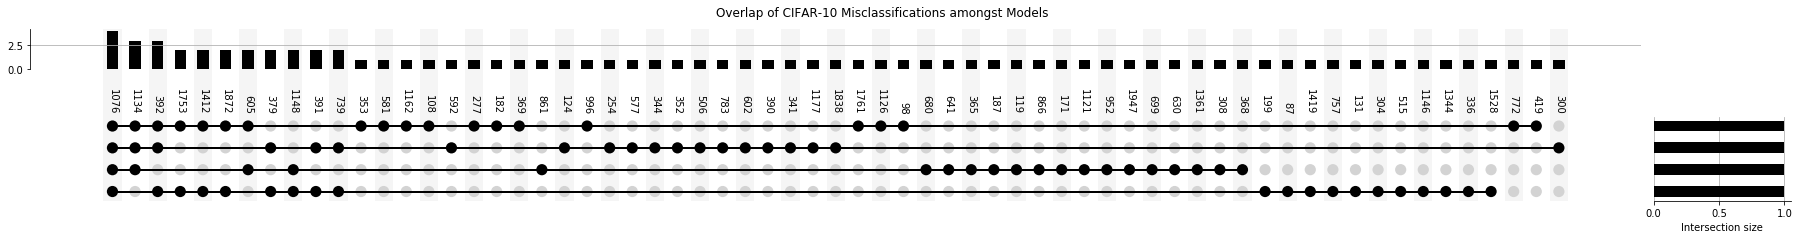

In [151]:
overlap = df101.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show() 

### now densenet

In [152]:
output = './densenet_BC_100_12/predictions_300.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9484
 -> Sanity Check: 9484 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.951244  0.9560  0.953616   1000.0000
1 automobile   0.971087  0.9740  0.972541   1000.0000
2 bird         0.955533  0.9240  0.939502   1000.0000
3 cat          0.899288  0.8840  0.891578   1000.0000
4  deer        0.937683  0.9630  0.950173   1000.0000
5 dog          0.898354  0.9280  0.912937   1000.0000
6 frog         0.966000  0.9660  0.966000   1000.0000
7 horse        0.983673  0.9640  0.973737   1000.0000
8 ship         0.954769  0.9710  0.962816   1000.0000
9 truck        0.968528  0.9540  0.961209   1000.0000
accuracy       0.948400  0.9484  0.948400      0.9484
macro avg      0.948616  0.9484  0.948411  10000.0000
weighted avg   0.948616  0.9484  0.948411  10000.0000


In [153]:
output = './densenet_BC_100_12/predictions_300_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.883
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.859296   0.855  0.857143   200.000
1 automobile   0.968354   0.765  0.854749   200.000
2 bird         0.873171   0.895  0.883951   200.000
3 cat          0.851064   0.800  0.824742   200.000
4  deer        0.898551   0.930  0.914005   200.000
5 dog          0.864322   0.860  0.862155   200.000
6 frog         0.921182   0.935  0.928040   200.000
7 horse        0.939394   0.930  0.934673   200.000
8 ship         0.858491   0.910  0.883495   200.000
9 truck        0.822511   0.950  0.881671   200.000
accuracy       0.883000   0.883  0.883000     0.883
macro avg      0.885634   0.883  0.882462  2000.000
weighted avg   0.885634   0.883  0.882462  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


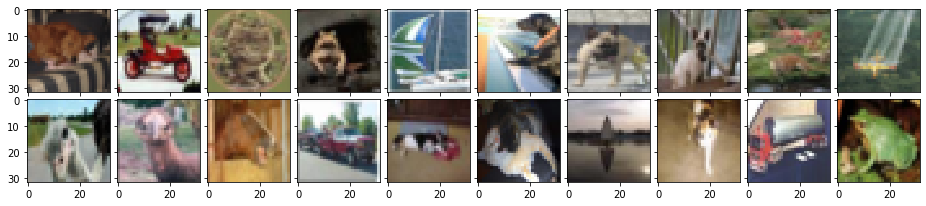

In [154]:
df_densenet_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [155]:
df_densenet_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999986,1.330717e-05,7.514643e+04,3,cat,5,dog,5830
1,0.999588,1.096647e-05,9.114944e+04,9,truck,1,automobile,1969
2,0.999925,1.023711e-05,9.767648e+04,6,frog,3,cat,5511
3,0.995281,7.736055e-06,1.286549e+05,5,dog,6,frog,8728
4,0.999388,6.549802e-06,1.525830e+05,0,airplane,8,ship,1772
5,0.887884,5.223285e-06,1.699857e+05,1,automobile,5,dog,2525
6,0.807098,4.371054e-06,1.846460e+05,5,dog,3,cat,2804
7,0.999940,5.301942e-06,1.885988e+05,5,dog,3,cat,4614
8,0.999968,2.706531e-06,3.694648e+05,4,deer,3,cat,4965
9,0.999197,1.989888e-06,5.021373e+05,8,ship,0,airplane,378


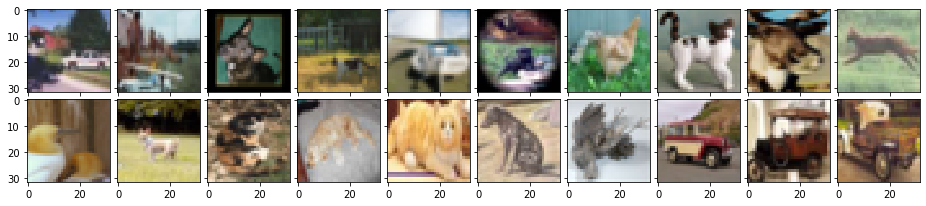

In [156]:
df_densenet_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [157]:
df_densenet_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.965693,1.702146e-04,5.673386e+03,9,truck,1,automobile,365
1,0.985442,1.526594e-04,6.455169e+03,8,ship,0,airplane,76
2,0.999797,1.389711e-04,7.194279e+03,3,cat,5,dog,1126
3,0.994349,1.198931e-04,8.293630e+03,4,deer,3,cat,772
4,0.996554,1.052018e-04,9.472788e+03,0,airplane,8,ship,1753
5,0.905748,8.101539e-05,1.117995e+04,8,ship,5,dog,1060
6,0.992400,6.888977e-05,1.440562e+04,3,cat,2,bird,592
7,0.999931,6.916542e-05,1.445709e+04,5,dog,3,cat,600
8,0.999896,5.984369e-05,1.670847e+04,3,cat,4,deer,996
9,0.928986,4.205892e-05,2.208772e+04,7,horse,3,cat,671


### densenet, no RA

### densenet, RA(2,5)

In [158]:
output = './densenet_BC_100_12_ra_2_5/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9313
 -> Sanity Check: 9313 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.930898  0.9430  0.936910   1000.0000
1 automobile   0.973843  0.9680  0.970913   1000.0000
2 bird         0.913828  0.9120  0.912913   1000.0000
3 cat          0.872497  0.8280  0.849666   1000.0000
4  deer        0.928571  0.9360  0.932271   1000.0000
5 dog          0.896130  0.8800  0.887992   1000.0000
6 frog         0.936461  0.9580  0.947108   1000.0000
7 horse        0.954092  0.9560  0.955045   1000.0000
8 ship         0.954545  0.9660  0.960239   1000.0000
9 truck        0.947988  0.9660  0.956909   1000.0000
accuracy       0.931300  0.9313  0.931300      0.9313
macro avg      0.930886  0.9313  0.930997  10000.0000
weighted avg   0.930886  0.9313  0.930997  10000.0000


In [159]:
output = './densenet_BC_100_12_ra_2_5/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.847
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.814634   0.835  0.824691   200.000
1 automobile   0.968153   0.760  0.851541   200.000
2 bird         0.843137   0.860  0.851485   200.000
3 cat          0.779570   0.725  0.751295   200.000
4  deer        0.835681   0.890  0.861985   200.000
5 dog          0.837696   0.800  0.818414   200.000
6 frog         0.884615   0.920  0.901961   200.000
7 horse        0.878049   0.900  0.888889   200.000
8 ship         0.852217   0.865  0.858561   200.000
9 truck        0.802632   0.915  0.855140   200.000
accuracy       0.847000   0.847  0.847000     0.847
macro avg      0.849638   0.847  0.846396  2000.000
weighted avg   0.849638   0.847  0.846396  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


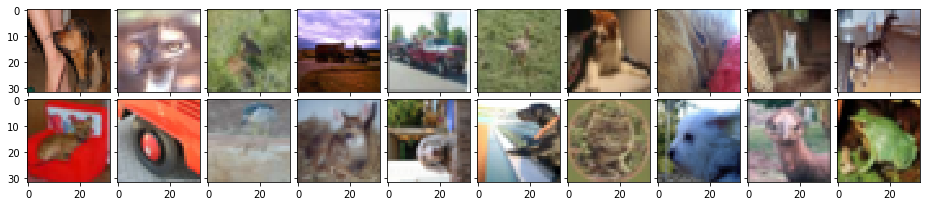

In [160]:
df_densenet_ra_2_5_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [161]:
df_densenet_ra_2_5_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.800650,9.851829e-06,8.126917e+04,3,cat,5,dog,2061
1,0.992131,1.217273e-05,8.150434e+04,3,cat,2,bird,5862
2,0.998805,1.159369e-05,8.615071e+04,2,bird,4,deer,9386
3,0.999989,1.128641e-05,8.860115e+04,0,airplane,9,truck,3957
4,0.999993,6.264517e-06,1.596281e+05,9,truck,1,automobile,9227
5,0.999992,5.347182e-06,1.870130e+05,4,deer,2,bird,1325
6,0.999995,4.692158e-06,2.131205e+05,5,dog,3,cat,61
7,0.997054,4.320059e-06,2.307963e+05,4,deer,3,cat,916
8,0.999801,2.758338e-06,3.624649e+05,3,cat,5,dog,4740
9,0.999913,2.158153e-06,4.633190e+05,7,horse,3,cat,4485


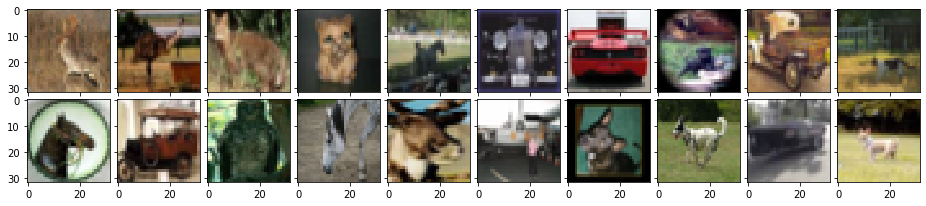

In [162]:
df_densenet_ra_2_5_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [163]:
df_densenet_ra_2_5_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999802,6.228522e-05,1.605199e+04,2,bird,4,deer,977
1,0.956955,4.801135e-05,1.993185e+04,7,horse,2,bird,571
2,0.999263,4.995008e-05,2.000524e+04,4,deer,3,cat,668
3,0.999954,4.431286e-05,2.256578e+04,5,dog,3,cat,757
4,0.872498,2.953563e-05,2.954052e+04,0,airplane,7,horse,1426
5,0.982307,1.678094e-05,5.853705e+04,9,truck,1,automobile,382
6,0.995198,1.523278e-05,6.533263e+04,9,truck,1,automobile,309
7,0.713014,1.080462e-05,6.599159e+04,8,ship,5,dog,1060
8,0.999896,1.397156e-05,7.156654e+04,9,truck,1,automobile,336
9,0.995222,1.112393e-05,8.946680e+04,4,deer,3,cat,772


### densenet, RA(2,20)

In [165]:
output = './densenet_BC_100_12_ra_2_20/predictions_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9168
 -> Sanity Check: 9168 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.921569  0.9400  0.930693   1000.0000
1 automobile   0.960199  0.9650  0.962594   1000.0000
2 bird         0.899696  0.8880  0.893810   1000.0000
3 cat          0.791825  0.8330  0.811891   1000.0000
4  deer        0.925553  0.9200  0.922768   1000.0000
5 dog          0.883103  0.8310  0.856260   1000.0000
6 frog         0.940358  0.9460  0.943170   1000.0000
7 horse        0.955010  0.9340  0.944388   1000.0000
8 ship         0.951244  0.9560  0.953616   1000.0000
9 truck        0.943676  0.9550  0.949304   1000.0000
accuracy       0.916800  0.9168  0.916800      0.9168
macro avg      0.917223  0.9168  0.916849  10000.0000
weighted avg   0.917223  0.9168  0.916849  10000.0000


In [166]:
output = './densenet_BC_100_12_ra_2_20/predictions_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.829
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score   support
0 airplane     0.798030   0.810  0.803970   200.000
1 automobile   0.949045   0.745  0.834734   200.000
2 bird         0.803922   0.820  0.811881   200.000
3 cat          0.714286   0.750  0.731707   200.000
4  deer        0.841837   0.825  0.833333   200.000
5 dog          0.819149   0.770  0.793814   200.000
6 frog         0.897959   0.880  0.888889   200.000
7 horse        0.873096   0.860  0.866499   200.000
8 ship         0.866029   0.905  0.885086   200.000
9 truck        0.770833   0.925  0.840909   200.000
accuracy       0.829000   0.829  0.829000     0.829
macro avg      0.833418   0.829  0.829082  2000.000
weighted avg   0.833418   0.829  0.829082  2000.000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


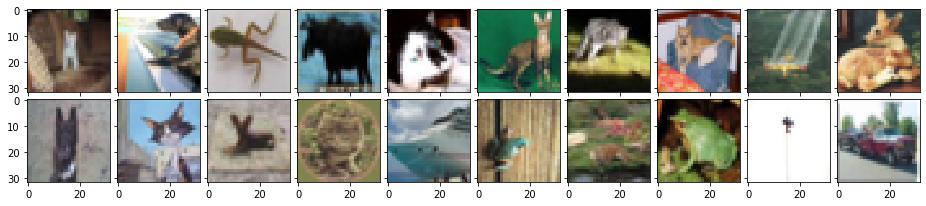

In [167]:
df_densenet_ra_2_20_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [168]:
df_densenet_ra_2_20_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.993151,3.740463e-05,2.655154e+04,3,cat,5,dog,4740
1,0.926264,2.883286e-05,3.212528e+04,2,bird,5,dog,2525
2,0.999909,2.832835e-05,3.529712e+04,0,airplane,6,frog,8573
3,0.999974,2.606528e-05,3.836421e+04,7,horse,4,deer,9840
4,0.999979,1.506740e-05,6.636705e+04,5,dog,3,cat,7384
5,0.999803,1.054540e-05,9.480935e+04,4,deer,3,cat,7881
6,0.999728,7.905124e-06,1.264658e+05,2,bird,3,cat,5908
7,0.999989,6.876061e-06,1.454306e+05,3,cat,5,dog,4051
8,0.999993,3.932442e-06,2.542932e+05,8,ship,0,airplane,378
9,0.681665,2.524843e-06,2.699832e+05,3,cat,4,deer,3297


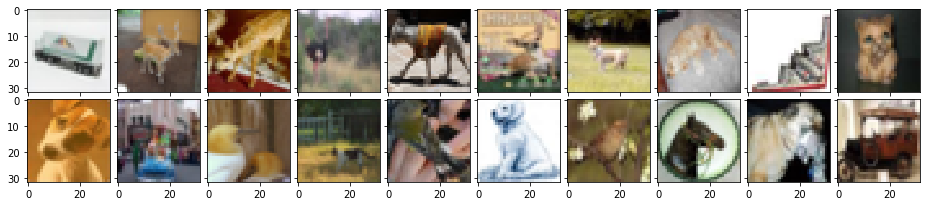

In [169]:
df_densenet_ra_2_20_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [170]:
df_densenet_ra_2_20_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.764676,1.927351e-04,3.967497e+03,0,airplane,9,truck,1973
1,0.950902,2.189423e-04,4.343162e+03,0,airplane,4,deer,837
2,0.950164,2.062789e-04,4.606210e+03,6,frog,4,deer,910
3,0.921630,1.831568e-04,5.031919e+03,5,dog,2,bird,482
4,0.999746,1.773234e-04,5.637982e+03,7,horse,5,dog,1121
5,0.997061,1.382615e-04,7.211412e+03,4,deer,5,dog,1072
6,0.999184,1.225480e-04,8.153408e+03,4,deer,5,dog,1076
7,0.770954,6.096006e-05,1.264688e+04,3,cat,5,dog,1134
8,0.995199,7.638460e-05,1.302879e+04,3,cat,0,airplane,7
9,0.999945,5.403101e-05,1.850687e+04,5,dog,3,cat,757


### densenet, RA(3,20)

In [171]:
output = './densenet_BC_100_12_ra_3_20/predictions_400_refined50.npz'
npzfile = np.load(output)
confirm_score(npzfile, test_labels_CIFAR10)


Accuracy: 0.9076
 -> Sanity Check: 9076 of 10000 correct

              precision  recall  f1-score     support
0 airplane     0.899322  0.9290  0.913920   1000.0000
1 automobile   0.954910  0.9530  0.953954   1000.0000
2 bird         0.871032  0.8780  0.874502   1000.0000
3 cat          0.807385  0.8090  0.808192   1000.0000
4  deer        0.898239  0.9180  0.908012   1000.0000
5 dog          0.890217  0.8190  0.853125   1000.0000
6 frog         0.927308  0.9440  0.935580   1000.0000
7 horse        0.938570  0.9320  0.935273   1000.0000
8 ship         0.940020  0.9560  0.947942   1000.0000
9 truck        0.948433  0.9380  0.943188   1000.0000
accuracy       0.907600  0.9076  0.907600      0.9076
macro avg      0.907544  0.9076  0.907369  10000.0000
weighted avg   0.907544  0.9076  0.907369  10000.0000


In [172]:
output = './densenet_BC_100_12_ra_3_20/predictions_400_refined50_CIFAR101.npz'
npzfile101 = np.load(output)
confirm_score(npzfile101, test_labels_CIFAR101)


Accuracy: 0.8095
 -> Sanity Check: 0 of 2000 correct

              precision  recall  f1-score    support
0 airplane     0.774510  0.7900  0.782178   200.0000
1 automobile   0.918129  0.7850  0.846361   200.0000
2 bird         0.788177  0.8000  0.794045   200.0000
3 cat          0.671362  0.7150  0.692494   200.0000
4  deer        0.831683  0.8400  0.835821   200.0000
5 dog          0.851852  0.6900  0.762431   200.0000
6 frog         0.840000  0.8400  0.840000   200.0000
7 horse        0.823810  0.8650  0.843902   200.0000
8 ship         0.823810  0.8650  0.843902   200.0000
9 truck        0.804444  0.9050  0.851765   200.0000
accuracy       0.809500  0.8095  0.809500     0.8095
macro avg      0.812778  0.8095  0.809290  2000.0000
weighted avg   0.812778  0.8095  0.809290  2000.0000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


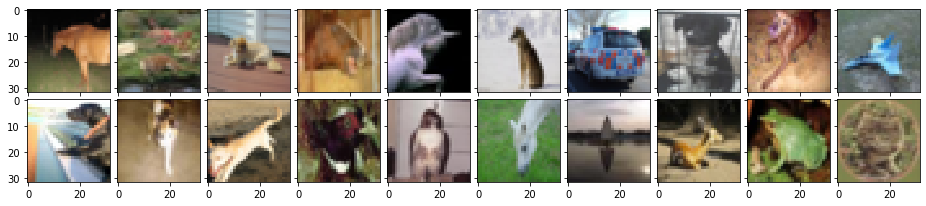

In [173]:
df_densenet_ra_3_20_errors = error_by_r_score(npzfile, test_labels_CIFAR10, test_data_CIFAR10)

In [174]:
df_densenet_ra_3_20_errors

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.999697,2.582991e-05,3.870306e+04,4,deer,7,horse,4892
1,0.988836,1.896691e-05,5.213478e+04,4,deer,3,cat,4965
2,0.999949,1.889461e-05,5.292246e+04,3,cat,5,dog,5609
3,0.991221,1.820815e-05,5.443830e+04,3,cat,7,horse,6151
4,0.784463,1.312460e-05,5.977043e+04,2,bird,7,horse,2010
5,0.695543,1.145100e-05,6.074080e+04,2,bird,5,dog,6257
6,0.996016,1.368873e-05,7.276179e+04,9,truck,1,automobile,1131
7,0.654117,6.452447e-06,1.013751e+05,8,ship,5,dog,2590
8,0.999862,9.137615e-06,1.094226e+05,6,frog,5,dog,8428
9,0.999991,7.151083e-06,1.398377e+05,2,bird,0,airplane,5310


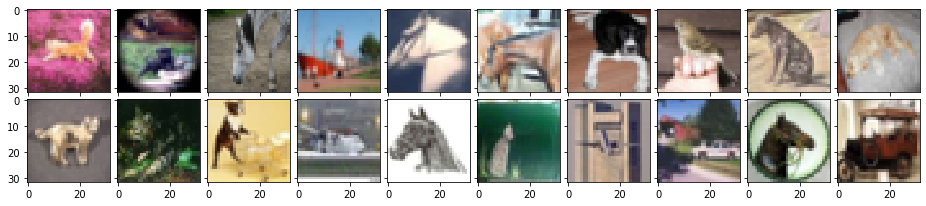

In [175]:
df_densenet_ra_3_20_errors_101  = error_by_r_score(npzfile101, test_labels_CIFAR101, test_data_CIFAR101)

In [176]:
df_densenet_ra_3_20_errors_101

,prob_predicted,prob_correct,r_value,label_predicted_id,label_predicted,correct_label,correct_label_id,img_index
0,0.996307,3.179008e-04,3.134017e+03,2,bird,3,cat,733
1,0.620047,1.707050e-04,3.632269e+03,8,ship,5,dog,1060
2,0.997446,2.689205e-04,3.709073e+03,2,bird,7,horse,1414
3,0.985097,2.649529e-04,3.718008e+03,0,airplane,8,ship,1718
4,0.999758,2.159648e-04,4.629264e+03,8,ship,7,horse,1427
5,0.775721,1.651032e-04,4.698398e+03,0,airplane,7,horse,1406
6,0.999799,2.009110e-04,4.976327e+03,3,cat,5,dog,1052
7,0.829342,1.656696e-04,5.006000e+03,3,cat,2,bird,557
8,0.996825,1.797501e-04,5.545616e+03,3,cat,5,dog,1148
9,0.998330,1.565231e-04,6.378163e+03,3,cat,5,dog,1134


### compare all densenet

The number of common misclassifications across all models: 3
{2405, 2525, 5511}


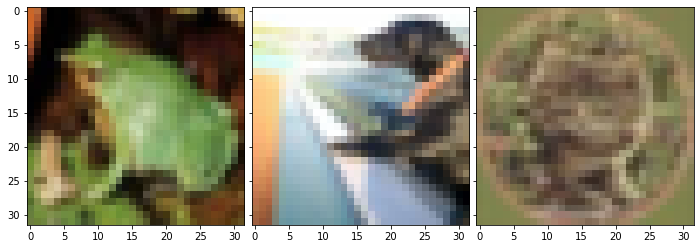

In [178]:
# View intersection of errors
#change the intersect
intersect = set(df_densenet_errors.img_index) & \
            set(df_densenet_ra_2_5_errors.img_index) & \
            set(df_densenet_ra_2_20_errors.img_index) & \
            set(df_densenet_ra_3_20_errors.img_index)

print("The number of common misclassifications across all models:", len(intersect))
print(intersect)

images_to_print = []

for i in intersect:
    img=Image.fromarray(test_data_CIFAR10[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [179]:
df = pd.DataFrame()

# change these labels

# intersect = set(df_resnet32_errors.img_index) & \
#             set(df_resnet32_errors_ra_2_5.img_index) & \
#             set(df_resnet32_errors_ra_2_20.img_index) & \
#             set(df_resnet32_errors_ra_3_20.img_index)

for m, me in [('densenet', df_densenet_errors.img_index), 
              ('densenet_ra_2_5', df_densenet_ra_2_5_errors.img_index), 
              ('densenet_ra_2_20', df_densenet_ra_2_20_errors.img_index), 
              ('densenet_ra_3_20', df_densenet_ra_3_20_errors.img_index)]:
    for e in me:
        df.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.fillna(False, inplace=True)
cols = df.columns
df.reset_index(inplace=True)
df

,index,5830,1969,5511,8728,1772,2525,2804,4614,4965,378,7657,2592,6151,9227,7509,9431,5548,7099,6741,2405,2061,5862,9386,3957,1325,61,916,4740,4485,8469,3789,1248,5417,7620,5098,8573,9840,7384,7881,5908,4051,3297,2161,8778,3192,665,1935,3444,4892,5609,2010,6257,1131,2590,8428,5310,4942,8166,4646,4309,2581
0,densenet,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,densenet_ra_2_5,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,densenet_ra_2_20,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,densenet_ra_3_20,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True


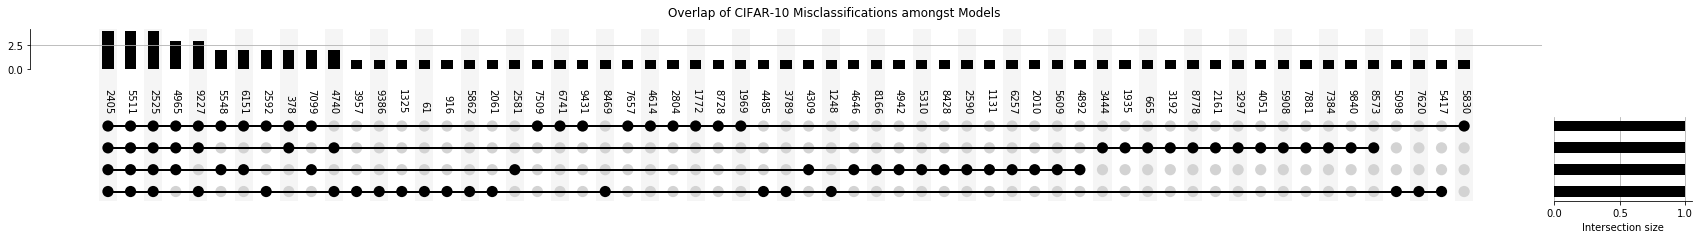

In [180]:
overlap = df.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show()  

The number of common misclassifications across all models: 1
{391}


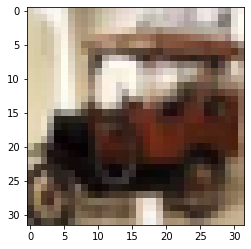

In [182]:
# View intersection of errors
intersect101 = set(df_densenet_errors_101.img_index) & \
            set(df_densenet_ra_2_5_errors_101.img_index) & \
            set(df_densenet_ra_2_20_errors_101.img_index) & \
            set(df_densenet_ra_3_20_errors_101.img_index)

            
print("The number of common misclassifications across all models:", len(intersect101))
print(intersect101)

# View errors 
# df_errors_101 = pd.DataFrame({'resnext_29_4x64' : df_resnext4_errors_101.img_index,
#                              'resnext_29_8x64' : df_resnext8_errors_101.img_index,
#                              'resnet32' : df_resnet32_errors_101.img_index,
#                              'densenet' : df_densenet_errors_101.img_index,
#                              'wrn_28_10' : df_wrn_28_10_errors_101.img_index,
#                              'pyramidnet_basic_110_84' : df_pyramidnet_basic_110_84_errors_101.img_index,
#                              'resnet44' : df_resnet44_errors.img_index})

images_to_print = []

for i in intersect101:
    img=Image.fromarray(test_data_CIFAR101[i])
    images_to_print.append(img)

# Print the misclassified images
fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, len(intersect101)), axes_pad=0.1,  )

for ax, im in zip(grid, images_to_print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

In [183]:
df101 = pd.DataFrame()

for m, me in [('densenet', df_densenet_errors_101.img_index), 
              ('densenet_ra_2_5', df_densenet_ra_2_5_errors_101.img_index), 
              ('densenet_ra_2_20', df_densenet_ra_2_20_errors_101.img_index), 
              ('densenet_ra_3_20', df_densenet_ra_3_20_errors_101.img_index)]:
    for e in me:
        df101.loc[m, str(e)] = True
    
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df101.fillna(False, inplace=True)
cols = df101.columns
df101.reset_index(inplace=True)
df101

,index,365,76,1126,772,1753,1060,592,600,996,671,420,1076,783,1134,602,1148,433,254,391,336,977,571,668,757,1426,382,309,1412,528,1414,167,1117,1623,1973,837,910,482,1121,1072,7,1139,381,426,1045,471,1164,733,1718,1427,1406,1052,557,664,739,1059,182,1538,611,98
0,densenet,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,densenet_ra_2_5,False,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,densenet_ra_2_20,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,densenet_ra_3_20,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True


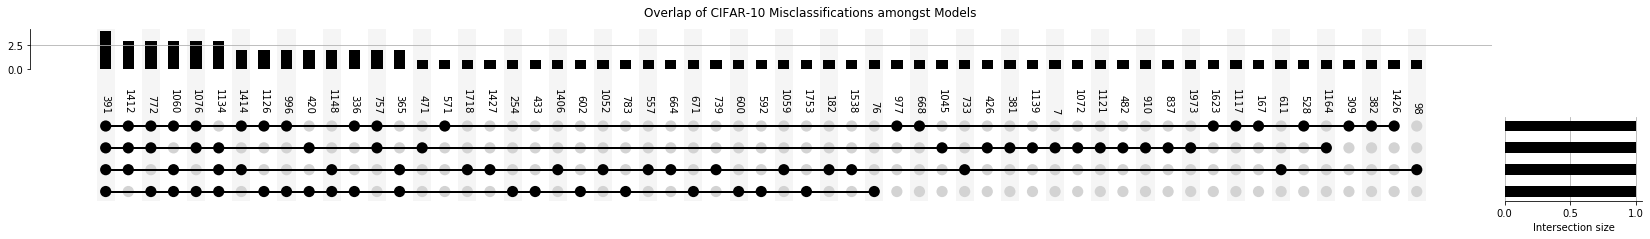

In [184]:
overlap = df101.groupby(list(cols))['index'].count()

plot(overlap, orientation='vertical')  
from matplotlib import pyplot
plt.suptitle('Overlap of CIFAR-10 Misclassifications amongst Models')
pyplot.show() 